In [6]:
%pip install --quiet --upgrade diffusers transformers accelerate invisible_watermark mediapy omegaconf


!pip install omegaconf




use_refiner = False


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.9 MB/s eta 0:00:00


In [7]:

import mediapy as media
import random
import sys
import torch

from diffusers import DiffusionPipeline

model = "digiplay/Realisian_v5"

pipe = DiffusionPipeline.from_pretrained(
    model,
    torch_dtype=torch.float16,
    safety_checker=None,
    requires_safety_checker=False
)

pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/584 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

Prompt:	A futuristic cityscape with flying cars
Seed:	4329492846


""

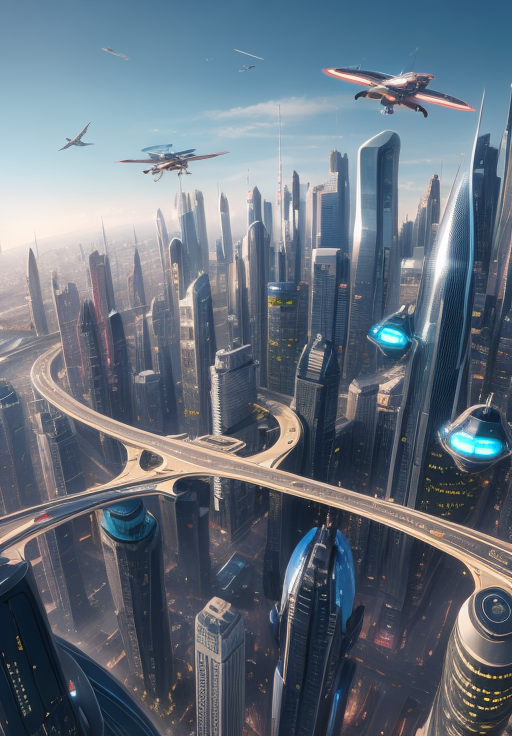

In [13]:

import os
prompt = "A futuristic cityscape with flying cars"
seed = 4329492846

negative_prompt = "bad-picture-chill-75v, ng_deepnegative_v1_75t, badhandv4, (worst quality:2), (low quality:2), (normal quality:2), (lowres:2), (bad anatomy:2), (bad hands:2), (watermark:2), (mole:1.5), (freckles:1.5)"

width = 512
height = 736


width = int(width)
height = int(height)

images = pipe(
    prompt=prompt,
    width=width,
    height=height,
    negative_prompt=negative_prompt,
    output_type="latent" if use_refiner else "pil",
    generator=torch.Generator().manual_seed(seed)
).images


if use_refiner:
  images = refiner(
      prompt = prompt,
      negative_prompt = negative_prompt,
      image = images,
      ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")


base_filename = "output.jpg"
new_filename = base_filename


if os.path.exists(base_filename):

    index = 1
    while True:
        new_filename = f"output_{index}.jpg"
        if not os.path.exists(new_filename):
            break
        index += 1


images[0].save(new_filename)

media.show_images(images)